# TASK

# =============

## In this notebook, find sections related to conducting a time-series analysis on the Storms project for named storms of the Atlantic Basin.
### -Importing libraries and data
### -Creating a subset with datetime as index
### -Chart the data
### -Decompose the data
### -Check for stationarity with Dickey-Fuller test
### -Check autocorrelation

# =============

# Import libraries and data

In [1]:
# import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [3]:
# import data

df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'storms_time.xlsx'))

In [4]:
df.head()

,name,year,month,day,hour,date,time,combined time,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975,6,27,0,1975-6-27,00:00:00,27/06/1975 00:00,27.5,-79.0,tropical depression,-1,25,1013,0,0
1,Amy,1975,6,27,6,1975-6-27,06:00:00,27/06/1975 06:00,28.5,-79.0,tropical depression,-1,25,1013,0,0
2,Amy,1975,6,27,12,1975-6-27,12:00:00,27/06/1975 12:00,29.5,-79.0,tropical depression,-1,25,1013,0,0
3,Amy,1975,6,27,18,1975-6-27,18:00:00,27/06/1975 18:00,30.5,-79.0,tropical depression,-1,25,1013,0,0
4,Amy,1975,6,28,0,1975-6-28,00:00:00,28/06/1975 00:00,31.5,-78.8,tropical depression,-1,25,1012,0,0


In [5]:
df.isnull().sum()

name                              0
year                              0
month                             0
day                               0
hour                              0
date                              0
time                              0
combined time                     0
latitude                          0
longitude                         0
status                            0
category                          0
wind_knots                        0
pressure_hpa                      0
trop_storm_force_wind_diameter    0
hurricane_force_wind_diameter     0
dtype: int64

In [6]:
df.shape

(12230, 16)

In [7]:
# check date range of df

df['year'].value_counts(dropna=False).sort_index()

1975     86
1976     52
1977     53
1978     54
1979    301
1980    161
1981    164
1982    105
1983     79
1984    236
1985    263
1986     70
1987     80
1988    252
1989    354
1990    355
1991    131
1992    185
1993    128
1994    206
1995    652
1996    315
1997    154
1998    410
1999    210
2000    318
2001    371
2002    285
2003    422
2004    410
2005    498
2006    190
2007    213
2008    335
2009    153
2010    402
2011    323
2012    454
2013    202
2014    139
2015    220
2016    396
2017    306
2018    266
2019    330
2020    570
2021    371
Name: year, dtype: int64

## Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data. (Step 3)
### In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

In [8]:
# drop unnecessary columns

df_sub = df.drop(columns = ['year', 'month', 'day', 'hour'])

In [9]:
df_sub.head()

,name,date,time,combined time,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975-6-27,00:00:00,27/06/1975 00:00,27.5,-79.0,tropical depression,-1,25,1013,0,0
1,Amy,1975-6-27,06:00:00,27/06/1975 06:00,28.5,-79.0,tropical depression,-1,25,1013,0,0
2,Amy,1975-6-27,12:00:00,27/06/1975 12:00,29.5,-79.0,tropical depression,-1,25,1013,0,0
3,Amy,1975-6-27,18:00:00,27/06/1975 18:00,30.5,-79.0,tropical depression,-1,25,1013,0,0
4,Amy,1975-6-28,00:00:00,28/06/1975 00:00,31.5,-78.8,tropical depression,-1,25,1012,0,0


In [10]:
# set date range

df_sub_2 = df_sub.loc[(df_sub['date'] >= '2001-1-1') & (df_sub['date'] < '2020-12-31')]

In [11]:
df_sub_2.head()

,name,date,time,combined time,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
5374,Allison,2001-6-5,12:00:00,05/06/2001 12:00,27.5,-95.0,tropical storm,0,40,1007,0,0
5375,Allison,2001-6-5,18:00:00,05/06/2001 18:00,28.5,-95.3,tropical storm,0,50,1002,0,0
5376,Allison,2001-6-5,21:00:00,05/06/2001 21:00,28.9,-95.3,tropical storm,0,45,1003,0,0
5377,Allison,2001-6-6,00:00:00,06/06/2001 00:00,29.3,-95.3,tropical storm,0,45,1003,0,0
5378,Allison,2001-6-6,06:00:00,06/06/2001 06:00,30.1,-95.2,tropical depression,-1,30,1006,0,0


In [12]:
df_sub_2.shape

(6078, 12)

##### I made a subset for data ranging from the year 2001 through 2020 to examine a 20 year period, and because data collected for 2021 only contained information for a few of that year's storms.

### (Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.)

In [13]:
# Set the 'date' column as the index

from datetime import datetime

df_sub_2['datetime'] = pd.to_datetime(df_sub_2['date']) # Create a datetime column from 'date'
df_sub_2 = df_sub_2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub_2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub_2.head()

,name,time,combined time,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
datetime,,,,,,,,,,,
2001-06-05,Allison,12:00:00,05/06/2001 12:00,27.5,-95.0,tropical storm,0,40,1007,0,0
2001-06-05,Allison,18:00:00,05/06/2001 18:00,28.5,-95.3,tropical storm,0,50,1002,0,0
2001-06-05,Allison,21:00:00,05/06/2001 21:00,28.9,-95.3,tropical storm,0,45,1003,0,0
2001-06-06,Allison,00:00:00,06/06/2001 00:00,29.3,-95.3,tropical storm,0,45,1003,0,0
2001-06-06,Allison,06:00:00,06/06/2001 06:00,30.1,-95.2,tropical depression,-1,30,1006,0,0


## Create a line chart of your data. (Step 4)

In [14]:
# remove more columns to examine one value

df_wind = df_sub_2.drop(columns = ['name', 'time', 'combined time', 'latitude', 'longitude', 'status', 'category', 'pressure_hpa', 'trop_storm_force_wind_diameter', 'hurricane_force_wind_diameter'])

In [15]:
df_wind.head()

,wind_knots
datetime,
2001-06-05,40
2001-06-05,50
2001-06-05,45
2001-06-06,45
2001-06-06,30


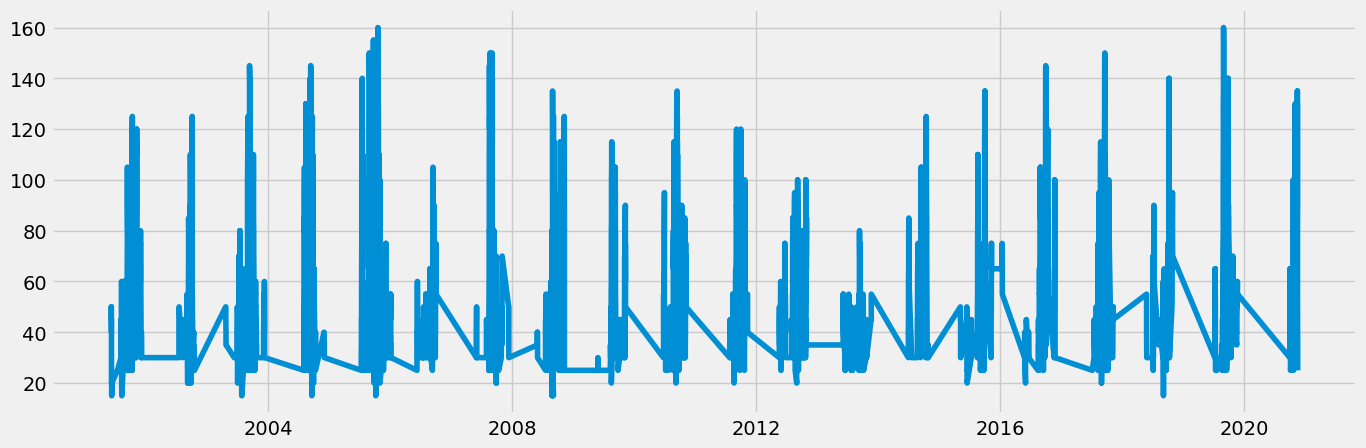

In [16]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_wind)

## Decompose the data’s components. (Step 5)
### Analyze the results from the plot in a markdown cell.

In [21]:
# Check for missing values

df_wind.isnull().sum()

wind_knots    0
dtype: int64

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_wind, model='additive', period = int(len(df_wind)/2)) # period set for max possible value 

In [23]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

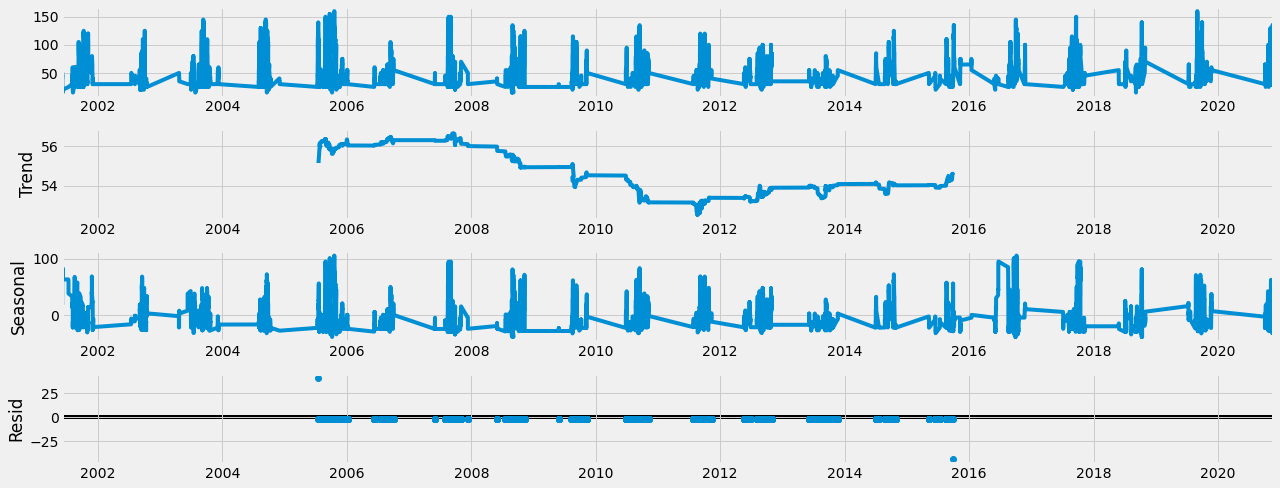

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

##### In the chart above, the seasonal line looks very similar to the level line, which suggests a strong seasonal relationship within the data. This is to be expected since Atlantic storms typically occur during specific warmer months every year. The trend line drops from 2008-2021 before plateauing until around the very end of 2015, when the line begins to curve upwards again. Both of these lines seen separately suggest there's a non-stationary element to the data.

## Conduct a Dickey-Fuller test to check for stationarity. (Step 6)
### Interpret the results in a markdown cell and reference your null hypothesis.

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_wind['wind_knots'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.701167e+01
p-value                        8.582518e-30
Number of Lags Used            2.000000e+00
Number of Observations Used    6.075000e+03
Critical Value (1%)           -3.431427e+00
Critical Value (5%)           -2.862016e+00
Critical Value (10%)          -2.567023e+00
dtype: float64


##### I want to disprove that there's a unit root, meaning my data would be stationary. To determine this, I need my 'Test Statistic' value to be smaller than my critical value of at least 5%, which would mean I can refect my null hypothesis that a unit root is present. 

##### My Test Statistic is roughly -17 and my critical value at 5% is -2.86, meaning my test statistic is smaller than my critical value, and with a p-value essentially 0 indicating a significant result, I can safely reject my null hypothesis: there is no unit root, and the data is stationary.

## Check your data’s autocorrelations. (Step 9)

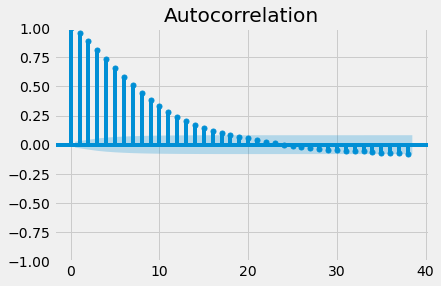

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_wind)
plt.show()

##### After checking for autocorrelation, the presence of more than ten lags above the confidence interval suggests the stationarity of the data is weaker than the Dickey-Fuller test suggests. I'll conduct some differencing to see if this changes anything.

In [23]:
# Use the df.shift() function

df_diff = df_wind - df_wind.shift(1)

In [24]:
# remove missing values

df_diff.dropna(inplace = True)

In [25]:
df_diff.head()

,wind_knots
datetime,
2001-06-05,10.0
2001-06-05,-5.0
2001-06-06,0.0
2001-06-06,-15.0
2001-06-06,-10.0


In [27]:
df_diff.columns

Index(['wind_knots'], dtype='object')

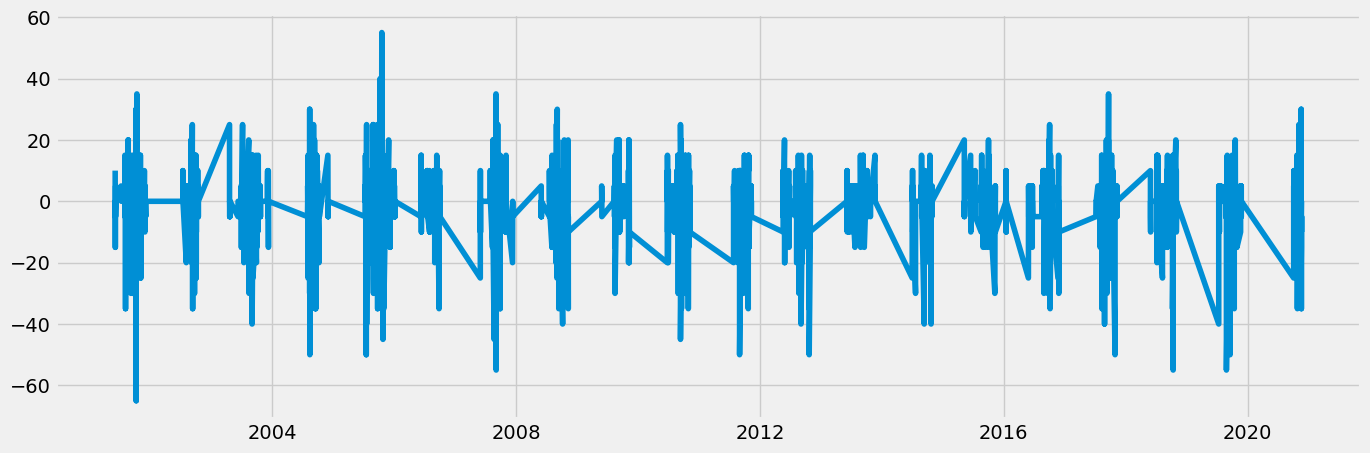

In [28]:
# replot the line curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [29]:
# rerun dickey-fuller test

dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -20.285886
p-value                           0.000000
Number of Lags Used              28.000000
Number of Observations Used    6048.000000
Critical Value (1%)              -3.431432
Critical Value (5%)              -2.862018
Critical Value (10%)             -2.567024
dtype: float64


##### The test statistic of -20 is still less than both the 5% and 10% critical values of -2.86 and -2.57, respectively. With a p-value of 0, we can be confident the test indicates a significant result, and we can still reject the null hypothesis and determine the data is stationary.

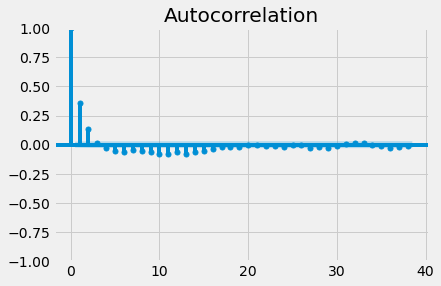

In [30]:
# replot autocorrelation

plot_acf(df_diff)
plt.show()

##### This new autocorrelation plot displays a better defense against the null hypthesis, since there are less lags above the confidence interval, suggesting the data is stationary.